# UnderSampling techniques....

#### friedman_aligned_ranks_test for ranking of classifiers

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import itertools as it

def friedman_aligned_ranks_test(*args):
    k = len(args)
    if k < 2: raise ValueError('Less than 2 levels')
    n = len(args[0])
    if len(set([len(v) for v in args])) != 1: raise ValueError('Unequal number of samples')

    aligned_observations = []
    for i in range(n):
        loc = sp.mean([col[i] for col in args])
        aligned_observations.extend([col[i] - loc for col in args])
        
    aligned_observations_sort = sorted(aligned_observations)
    
    aligned_ranks = []
    for i in range(n):
        row = []
        for j in range(k):
            v = aligned_observations[i*k+j]
            row.append(aligned_observations_sort.index(v) + 1 + (aligned_observations_sort.count(v)-1)/2.)
        aligned_ranks.append(row)

    rankings_avg = [sp.mean([case[j] for case in aligned_ranks]) for j in range(k)]
    rankings_cmp = [r/sp.sqrt(k*(n*k+1)/6.) for r in rankings_avg]

    r_i = [np.sum(case) for case in aligned_ranks]
    r_j = [np.sum([case[j] for case in aligned_ranks]) for j in range(k)]
    T = (k-1) * (sp.sum(v**2 for v in r_j) - (k*n**2/4.) * (k*n+1)**2) / float(((k*n*(k*n+1)*(2*k*n+1))/6.) - (1./float(k))*sp.sum(v**2 for v in r_i))

    p_value = 1 - st.chi2.cdf(T, k-1)

    return T, p_value, rankings_avg, rankings_cmp

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

In [3]:
cc_data=pd.read_csv('creditcard_new_small.csv')
cc_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,41389,0.066610,0.923966,1.333079,1.257894,-0.093219,-0.276932,0.320461,-0.061108,-0.649372,...,-0.165066,-0.424949,0.022085,-0.113166,-0.826237,0.389535,0.165323,0.163399,1.98,0
1,41390,-0.410577,-0.488786,0.532216,-1.430857,-0.781543,-0.238110,1.015318,-0.167507,-1.615309,...,-0.158038,-0.258762,0.437850,0.057153,-0.645066,1.316126,-0.000085,0.160719,214.86,0
2,41390,0.025918,0.239490,0.605971,1.533463,0.076635,0.711282,0.145906,0.315924,0.138562,...,0.196059,0.763738,0.292951,-0.360508,-0.926704,-0.335328,0.214499,0.142837,99.92,0
3,41391,1.317317,-0.030417,-1.088874,-0.557892,2.030908,3.267773,-0.536308,0.808507,-0.052607,...,-0.313907,-1.068412,0.104669,0.992075,0.369762,0.110479,-0.028115,0.011664,0.99,0
4,41391,-0.348685,0.987027,1.250715,0.082927,-0.148906,-1.022373,0.599258,0.031018,-0.115183,...,-0.282898,-0.841586,0.016354,0.282912,-0.222038,0.077962,0.232191,0.094575,6.99,0


In [4]:
X=cc_data.drop(['Class'],axis=1)
y=cc_data['Class']
print(len(X))
print(len(y))
print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))

5392
5392
5000
392


In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))
X=scaler.transform(X)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [6]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
skf

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [7]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1')
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=11)
import xgboost
from xgboost import XGBClassifier
xg=XGBClassifier()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha =0.2)
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=11)
from sklearn import tree
clf =  tree.DecisionTreeClassifier()

In [8]:
classifier = {'MultinomialNB': mnb,'GaussianNB': gnb,'logistic': lr,'RandomForest': rfc,'Adaboost': abc,
            'XGBoost':xg,'KNeighbors':knn,'SVM':svc,'DecisionTreeClassifier':clf}
classifie=sorted(classifier.keys())
print(classifie)
print(type(classifie))
# Classifi= classifi.append(classifie)
# df = pd.DataFrame({'Classiifier':classifie})
# print (df)

['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 'RandomForest', 'SVM', 'XGBoost', 'logistic']
<class 'list'>


In [9]:
  #defining a dictionary of classifier
classifier={'Adaboost': abc,'DecisionTreeClassifier':clf,'GaussianNB': gnb,'KNeighbors':knn,'MultinomialNB': mnb,
            'RandomForest': rfc,'SVM':svc,'XGBoost':xg,'logistic': lr}
# classifier=sorted(classifier)
# print(classifier)
Classifi=['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 'RandomForest', 'SVM'
          , 'XGBoost', 'logistic']

df=pd.DataFrame(Classifi,columns=['Classiifier'])
df
# print(classifier)

,Classiifier
0,Adaboost
1,DecisionTreeClassifier
2,GaussianNB
3,KNeighbors
4,MultinomialNB
5,RandomForest
6,SVM
7,XGBoost
8,logistic


## 1. RandomUnderSampler

In [10]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))
print('sampled dataset shape %s' % Counter(y))

5000
392
sampled dataset shape Counter({0: 5000, 1: 392})


Using TensorFlow backend.


In [11]:
X_rus, y_rus, id_rus = rus.fit_sample(X, y)
print('No. of Removed indexes:', len(id_rus))
print(np.count_nonzero(y_rus == 0))
print(np.count_nonzero(y_rus == 1))

No. of Removed indexes: 784
392
392


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)

In [13]:
#predict and storing score of each classifier
parameter = []
res=[]
res=pd.DataFrame(res)
for n,c in sorted (classifier.items()):
    results = cross_val_score(c,X_rus, y_rus, cv=skf)
#     print("\n classifier",c,"\n Cross validation results \n",results)
    parameter.append((n,[results.mean()]))
    result=pd.DataFrame(results)
#     print(result)
    res=pd.concat([res,result],axis=1,ignore_index=True)
# print(res)
res.columns = ['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 
               'RandomForest', 'SVM', 'XGBoost', 'logistic']
res

,Adaboost,DecisionTreeClassifier,GaussianNB,KNeighbors,MultinomialNB,RandomForest,SVM,XGBoost,logistic
0,0.987500,0.987500,0.975000,0.987500,0.925000,0.962500,0.937500,0.987500,0.912500
1,1.000000,1.000000,1.000000,0.950000,0.925000,1.000000,0.950000,1.000000,0.950000
2,0.987179,0.974359,0.974359,0.948718,0.858974,0.961538,0.935897,0.974359,0.923077
3,0.653846,0.961538,0.948718,0.935897,0.910256,0.961538,0.935897,0.974359,0.935897
4,1.000000,0.987179,0.961538,0.884615,0.807692,1.000000,0.897436,1.000000,0.910256
5,1.000000,1.000000,1.000000,0.923077,0.833333,1.000000,0.923077,1.000000,0.923077
6,1.000000,1.000000,1.000000,0.961538,0.794872,1.000000,0.923077,1.000000,0.948718
7,0.987179,0.974359,0.961538,0.974359,0.897436,0.974359,0.987179,0.987179,0.987179
8,1.000000,1.000000,1.000000,1.000000,0.948718,1.000000,1.000000,1.000000,1.000000
9,1.000000,1.000000,1.000000,1.000000,0.858974,1.000000,1.000000,1.000000,1.000000


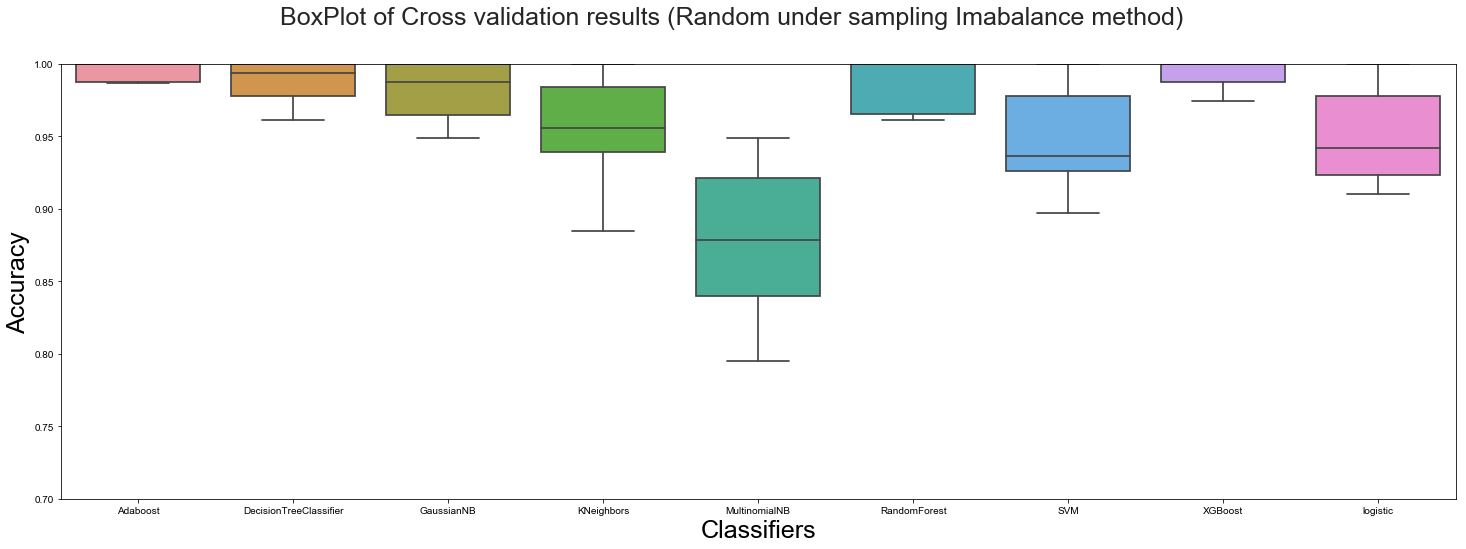

In [14]:
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res)
boxplot.set_ylim([0.7,1.0])
fig.suptitle('BoxPlot of Cross validation results (Random under sampling Imabalance method) ', fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel('Classifiers',fontsize=25)
plt.savefig('./Graph/RUS_cross_validation1.png')
plt.show()

In [15]:
parameter_df=pd.DataFrame.from_items(parameter,orient='index',columns=['mean'])
parameter_df

,mean
Adaboost,0.961571
DecisionTreeClassifier,0.988494
GaussianNB,0.982115
KNeighbors,0.956571
MultinomialNB,0.876026
RandomForest,0.985994
SVM,0.949006
XGBoost,0.992340
logistic,0.949071


In [16]:
p=friedman_aligned_ranks_test(res['Adaboost'],res['DecisionTreeClassifier'],res['GaussianNB'],res['KNeighbors'],
                              res['MultinomialNB'],res['RandomForest'],res['SVM'],res['XGBoost'],res['logistic'])
print(p)

# Chi2-value : float The computed Chi2-value of the test.
# p-value : float The associated p-value from the Chi2-distribution.
# rankings : array_like The ranking for each group.
# pivots : array_like The pivotal quantities for each group.

(45.30488767420216, 3.2213167378003504e-07, [58.6, 64.2, 57.0, 34.45, 8.7, 58.15, 30.65, 67.2, 30.55], [5.015696972227899, 5.495012723840122, 4.878749614624407, 2.9486477934001902, 0.7446512569689884, 4.977180527901917, 2.623397819091896, 5.75178901934667, 2.6148386092416778])


In [17]:
def predict(clf,X_test):
    return clf.predict(X_test)


 Classifier is: 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=11)
 Total time in : 
 0.18748712539672852
Confusion_matrix 
 [[123   1]
 [  0 112]]
Precision: 0.9911504424778761
Recall: 1.0
AUC: 0.996

 Classifier is: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
 Total time in : 
 0.015624761581420898
Confusion_matrix 
 [[124   0]
 [  0 112]]
Precision: 1.0
Recall: 1.0
AUC: 1.000

 Classifier is: 
 GaussianNB(priors=None, var_smoothing=1e-09)
 Total time in : 
 0.0
Confusion_matrix 
 [[120   4]
 [  0 112]]
Precision: 0.9655172413793104
Recall: 1.0

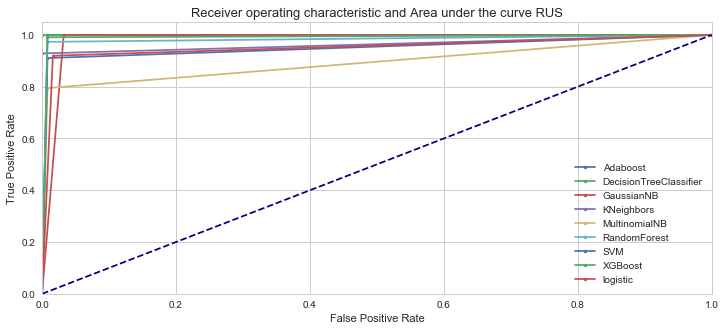

In [18]:
score = []
plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start = time.time()
    c.fit(X_train,y_train)
    pred = predict(c,X_test)
    end = time.time()
    print("\n Classifier is: \n",c)
    print(" Total time in : \n",end - start)
#     print("",c)
    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test, pred),
                    metrics.recall_score(y_test, pred)]))
    print("Confusion_matrix \n",confusion_matrix(y_test,pred))
    precision=print("Precision:",metrics.precision_score(y_test, pred))
    recall=print("Recall:",metrics.recall_score(y_test, pred))
#     ROC AND AUC CURVE
#     
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # calculate AUC
    auc = roc_auc_score(y_test, pred)
    print('AUC: %.3f' % auc)
    # plot no skill
    plt.plot(fpr, tpr, marker='.',label=n)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve RUS',fontsize=13)
plt.legend(loc=0,fontsize='small')
    # show the plot
plt.savefig('./Graph/RUS_2.png')
plt.show()

In [19]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores','Precision','Recall'])
score_df['Accuracy (%)']=score_df['scores']*100
score_df

,scores,Precision,Recall,Accuracy (%)
Adaboost,0.995763,0.991150,1.000000,99.576271
DecisionTreeClassifier,1.000000,1.000000,1.000000,100.000000
GaussianNB,0.983051,0.965517,1.000000,98.305085
KNeighbors,0.966102,1.000000,0.928571,96.610169
MultinomialNB,0.898305,0.988889,0.794643,89.830508
RandomForest,0.983051,0.990909,0.973214,98.305085
SVM,0.953390,0.990291,0.910714,95.338983
XGBoost,0.991525,0.991071,0.991071,99.152542
logistic,0.953390,0.980952,0.919643,95.338983


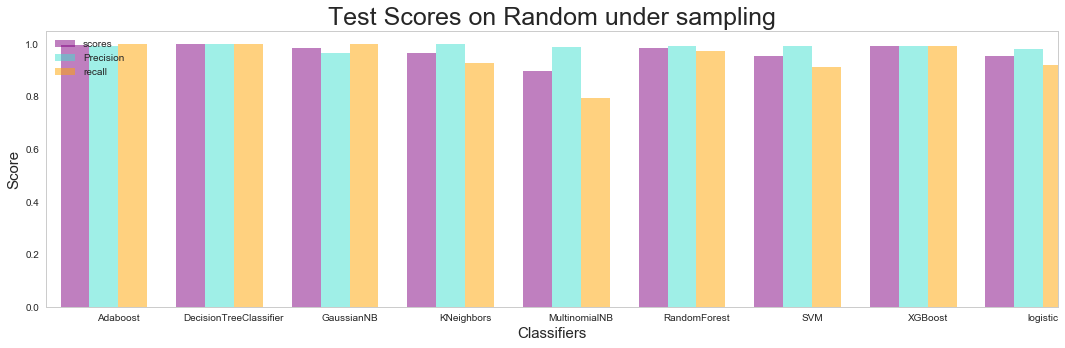

In [20]:
pos = list(range(len(df['Classiifier']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,5)) 
# Create a bar with pre_score data,in position pos,
plt.bar(pos,score_df['scores'],width,alpha=0.5,color='purple',label=score_df['scores'][0]) 
plt.bar([p + width for p in pos],score_df['Precision'],width,alpha=0.5,color='turquoise',label=score_df['Precision'][1]) 
plt.bar([p + width*2 for p in pos],score_df['Recall'],width,alpha=0.5, color='orange',label=score_df['Recall']) 

ax.set_ylabel('Score',fontsize=15)
ax.set_xlabel('Classifiers',fontsize=15)
ax.set_title('Test Scores on Random under sampling',fontsize=25)
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['Classiifier'])
plt.xlim(min(pos)-width, max(pos)+width*2)
# plt.ylim([0, max(score_df['scores'] + score_df['Precision'] + score_df['Recall'])] )
# plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.legend(['scores', 'Precision', 'recall'], loc='upper left')
plt.grid()
plt.savefig('./Graph/RUS_graph1.png')
plt.show()

### 2. Tomeklinks

In [21]:
from collections import Counter
# print('sampled dataset shape %s' % Counter(y))

In [22]:
from imblearn.under_sampling import TomekLinks
print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))

5000
392


In [23]:
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X, y) 

In [24]:
print('Resampled dataset shape %s' % Counter(y_tl))

Resampled dataset shape Counter({0: 4995, 1: 392})


In [25]:
print(np.count_nonzero(y_tl == 0))
print(np.count_nonzero(y_tl == 1))
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=42)

4995
392


<Figure size 2160x1800 with 0 Axes>

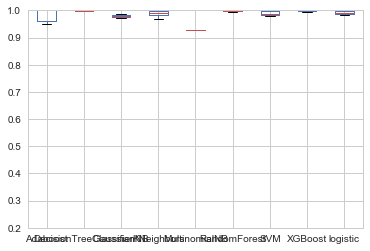

,Adaboost,DecisionTreeClassifier,GaussianNB,KNeighbors,MultinomialNB,RandomForest,SVM,XGBoost,logistic
0,0.098148,0.998148,0.953704,0.994444,0.925926,0.996296,0.979630,0.996296,0.985185
1,1.000000,0.996296,0.985185,0.966667,0.925926,0.994444,0.992593,0.998148,0.987037
2,0.998145,0.990724,0.983302,0.987013,0.927644,0.992579,0.983302,0.992579,0.983302
3,0.949907,0.996289,0.972171,0.990724,0.927644,0.996289,0.990724,0.996289,0.988868
4,1.000000,1.000000,0.977737,0.983302,0.927644,1.000000,0.985158,1.000000,0.983302
5,1.000000,1.000000,0.975836,0.985130,0.927509,1.000000,0.981413,1.000000,0.988848
6,1.000000,1.000000,0.975836,0.983271,0.927509,1.000000,0.977695,1.000000,0.988848
7,1.000000,1.000000,0.985130,0.996283,0.927509,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,0.981413,0.998141,0.927509,0.996283,1.000000,1.000000,1.000000
9,0.211896,0.998141,0.983271,1.000000,0.927509,1.000000,1.000000,1.000000,1.000000


In [26]:
#predict and storing score of each classifier
parameter = []
res=[]
plt.figure(figsize=(30,25))
fig, ax = plt.subplots()
res=pd.DataFrame(res)
for n,c in sorted (classifier.items()):
    results = cross_val_score(c,X_tl, y_tl, cv=skf)
#     print("\n classifier",c,"\n Cross validation results \n",results)
    parameter.append((n,[results.mean()]))
#     testres=friedman_aligned_ranks_test(results)
    result=pd.DataFrame(results)
#     print(result)
    res=pd.concat([res,result],axis=1,ignore_index=True)
# print(res)
res.columns = ['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 
               'RandomForest', 'SVM', 'XGBoost', 'logistic']

boxplot = res.boxplot(grid=True,figsize=(25,15))
boxplot.set_ylim([0.2,1.0])
plt.show()
res

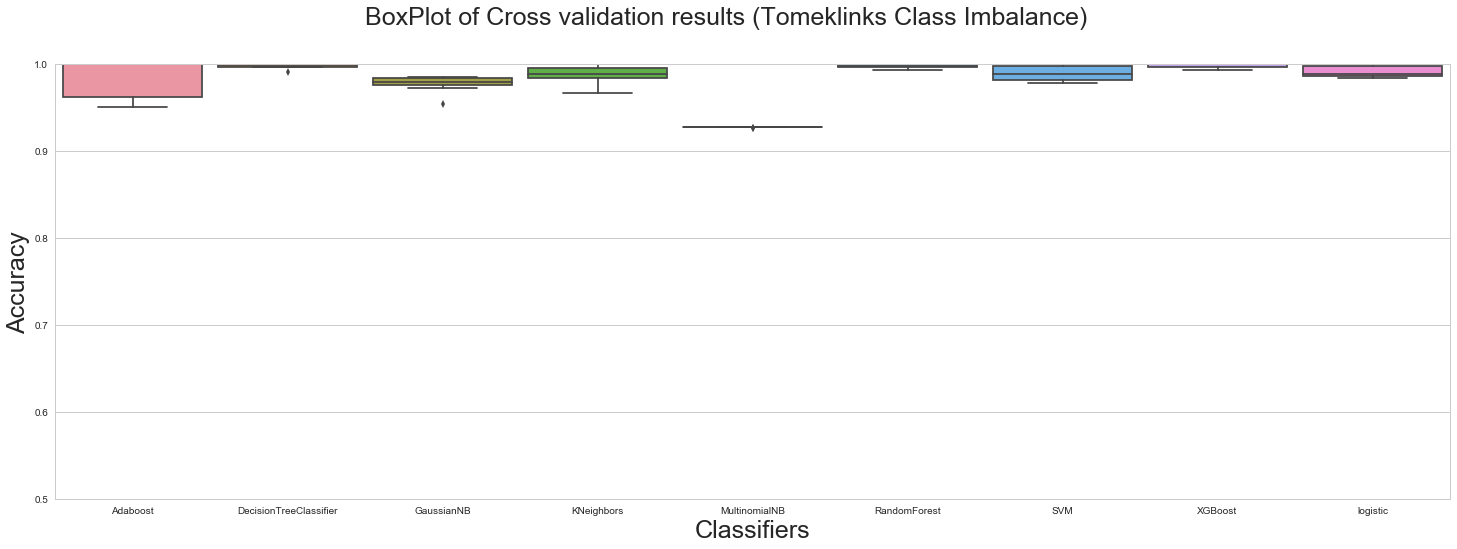

In [27]:
# rcParams['figure.figsize'] = 25,7
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res,width=0.9)
boxplot.set_ylim([0.8,1.0])
fig.suptitle('BoxPlot of Cross validation results (Tomeklinks Class Imbalance) ', fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel('Classifiers',fontsize=25)
plt.savefig('./Graph/tomeklinks_cross_validation.png')
plt.show()

In [28]:
parameter_df=pd.DataFrame.from_items(parameter,orient='index',columns=['mean'])
parameter_df

,mean
Adaboost,0.825810
DecisionTreeClassifier,0.997960
GaussianNB,0.977359
KNeighbors,0.988498
MultinomialNB,0.927233
RandomForest,0.997589
SVM,0.989051
XGBoost,0.998331
logistic,0.990539


In [29]:
p=friedman_aligned_ranks_test(res['Adaboost'],res['DecisionTreeClassifier'],res['GaussianNB'],res['KNeighbors'],
                              res['MultinomialNB'],res['RandomForest'],res['SVM'],res['XGBoost'],res['logistic'])
print(p)

# Chi2-value : float The computed Chi2-value of the test.
# p-value : float The associated p-value from the Chi2-distribution.
# rankings : array_like The ranking for each group.
# pivots : array_like The pivotal quantities for each group.

(32.355219650448745, 8.043648595867925e-05, [43.5, 61.8, 30.5, 40.7, 20.3, 61.2, 44.2, 63.1, 44.2], [3.723256284844942, 5.289591687434883, 2.6105590043165687, 3.483598409038831, 1.7375195995943065, 5.238236428333574, 3.7831707537964703, 5.400861415487721, 3.7831707537964703])


In [30]:
def predict(clf,X_test):
    return clf.predict(X_test)


 Classifier is: 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=11)
 Total time in : 
 1.0780673027038574
Confusion_matrix 
 [[1503    4]
 [   0  110]]
Precision: 0.9649122807017544
Recall: 1.0
AUC: 0.999

 Classifier is: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
 Total time in : 
 0.04687070846557617
Confusion_matrix 
 [[1503    4]
 [   1  109]]
Precision: 0.9646017699115044
Recall: 0.990909090909091
AUC: 0.994

 Classifier is: 
 GaussianNB(priors=None, var_smoothing=1e-09)
 Total time in : 
 0.015637874603271484
Confusion_matrix 
 [[1460   47]

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



 Classifier is: 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)
 Total time in : 
 1.4483377933502197
Confusion_matrix 
 [[1503    4]
 [   2  108]]
Precision: 0.9642857142857143
Recall: 0.9818181818181818
AUC: 0.990

 Classifier is: 
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
 Total time in : 
 0.04297447204589844
Confusion_matrix 
 [[1504    3]
 [  1

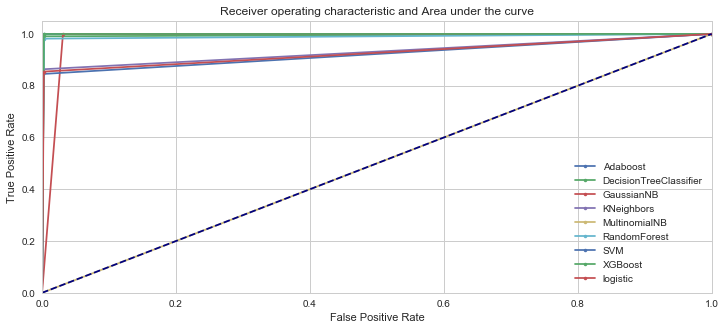

In [31]:
score = []
plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start = time.time()
    c.fit(X_train,y_train)
    pred = predict(c,X_test)
    end = time.time()
    print("\n Classifier is: \n",c)
    print(" Total time in : \n",end - start)
#     print("",c)
    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test, pred),
                    metrics.recall_score(y_test, pred)]))
    print("Confusion_matrix \n",confusion_matrix(y_test,pred))
    precision=print("Precision:",metrics.precision_score(y_test, pred))
    recall=print("Recall:",metrics.recall_score(y_test, pred))
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # calculate AUC
    auc = roc_auc_score(y_test, pred)
    print('AUC: %.3f' % auc)
    # plot no skill
    plt.plot(fpr, tpr, marker='.',label=n)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve',fontsize=12)
plt.legend(loc=0,fontsize='small')
    # show the plot
plt.savefig('./Graph/TomekLinks_2.png')
plt.show()

In [32]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores','Precision','Recall'])
score_df['Accuracy (%)']=score_df['scores']*100
score_df

,scores,Precision,Recall,Accuracy (%)
Adaboost,0.997526,0.964912,1.000000,99.752628
DecisionTreeClassifier,0.996908,0.964602,0.990909,99.690785
GaussianNB,0.970934,0.700637,1.000000,97.093383
KNeighbors,0.988868,0.969388,0.863636,98.886827
MultinomialNB,0.931973,0.000000,0.000000,93.197279
RandomForest,0.996289,0.964286,0.981818,99.628942
SVM,0.987631,0.968750,0.845455,98.763142
XGBoost,0.997526,0.964912,1.000000,99.752628
logistic,0.987631,0.959184,0.854545,98.763142


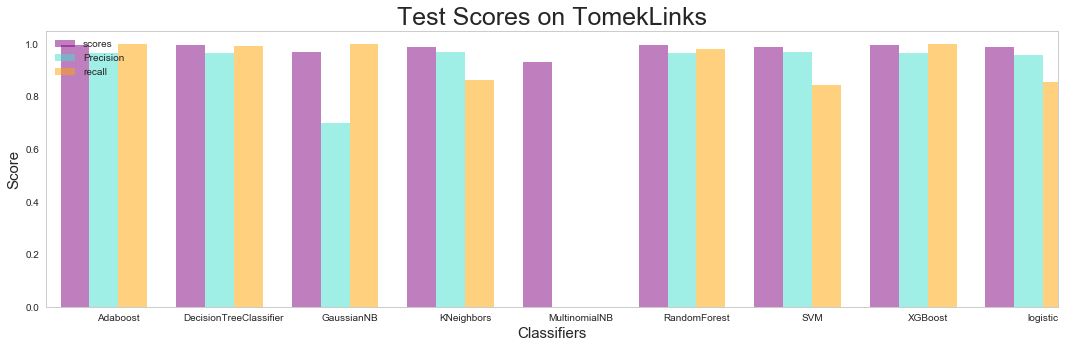

In [33]:
pos = list(range(len(df['Classiifier']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,5)) 
plt.bar(pos,score_df['scores'],width,alpha=0.5,color='purple',label=score_df['scores'][0]) 
plt.bar([p + width for p in pos],score_df['Precision'],width,alpha=0.5,color='turquoise',label=score_df['Precision'][1]) 
plt.bar([p + width*2 for p in pos],score_df['Recall'],width,alpha=0.5, color='orange',label=score_df['Recall']) 

ax.set_ylabel('Score',fontsize=15)
ax.set_xlabel('Classifiers',fontsize=15)
ax.set_title('Test Scores on TomekLinks',fontsize=25)
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['Classiifier'])
plt.xlim(min(pos)-width, max(pos)+width*2)
plt.tight_layout()
plt.legend(['scores', 'Precision', 'recall'], loc='upper left')
plt.grid()
plt.savefig('./Tomeklinks_graph1.png')
plt.show()

## 3. ClusterCentroids

In [34]:
print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))

5000
392


In [35]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids()
cc

ClusterCentroids(estimator=None, n_jobs=1, random_state=None, ratio=None,
                 sampling_strategy='auto', voting='auto')

In [36]:
X_cc, y_cc = cc.fit_sample(X, y)

In [37]:
print(np.count_nonzero(y_cc == 0))
print(np.count_nonzero(y_cc == 1))
X_train, X_test, y_train, y_test = train_test_split(X_cc, y_cc, test_size=0.33, random_state=42)

392
392


<Figure size 2160x1800 with 0 Axes>

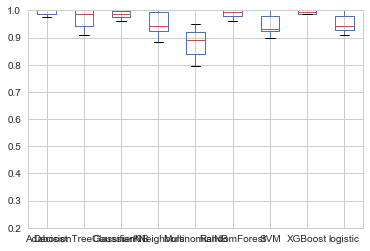

,Adaboost,DecisionTreeClassifier,GaussianNB,KNeighbors,MultinomialNB,RandomForest,SVM,XGBoost,logistic
0,0.987500,0.962500,0.987500,0.975000,0.912500,0.975000,0.925000,0.987500,0.937500
1,0.987500,1.000000,0.987500,0.950000,0.925000,1.000000,0.950000,0.987500,0.962500
2,0.974359,0.935897,0.961538,0.923077,0.871795,0.935897,0.923077,0.961538,0.923077
3,0.653846,0.910256,0.961538,0.935897,0.923077,0.961538,0.935897,0.961538,0.935897
4,1.000000,1.000000,0.974359,0.884615,0.833333,1.000000,0.897436,1.000000,0.910256
5,1.000000,0.974359,1.000000,0.923077,0.820513,0.987179,0.923077,1.000000,0.923077
6,1.000000,1.000000,1.000000,0.923077,0.794872,1.000000,0.910256,1.000000,0.948718
7,1.000000,1.000000,1.000000,1.000000,0.910256,1.000000,1.000000,1.000000,1.000000
8,1.000000,1.000000,0.987179,1.000000,0.948718,1.000000,1.000000,1.000000,1.000000
9,1.000000,0.935897,0.974359,1.000000,0.858974,0.987179,0.987179,0.987179,0.987179


In [38]:
#predict and storing score of each classifier
parameter = []
res=[]
plt.figure(figsize=(30,25))
fig, ax = plt.subplots()
res=pd.DataFrame(res)
for n,c in sorted (classifier.items()):
    results = cross_val_score(c,X_cc, y_cc, cv=skf)
#     print("\n classifier",c,"\n Cross validation results \n",results)
    parameter.append((n,[results.mean()]))
    result=pd.DataFrame(results)
#     print(result)
    res=pd.concat([res,result],axis=1,ignore_index=True)
# print(res)
res.columns = ['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 
               'RandomForest', 'SVM', 'XGBoost', 'logistic']

boxplot = res.boxplot(grid=True,figsize=(25,15))
boxplot.set_ylim([0.2,1.0])
plt.show()
res

In [39]:
parameter_df=pd.DataFrame.from_items(parameter,orient='index',columns=['mean'])
parameter_df

,mean
Adaboost,0.960321
DecisionTreeClassifier,0.971891
GaussianNB,0.983397
KNeighbors,0.951474
MultinomialNB,0.879904
RandomForest,0.984679
SVM,0.945192
XGBoost,0.988526
logistic,0.952821


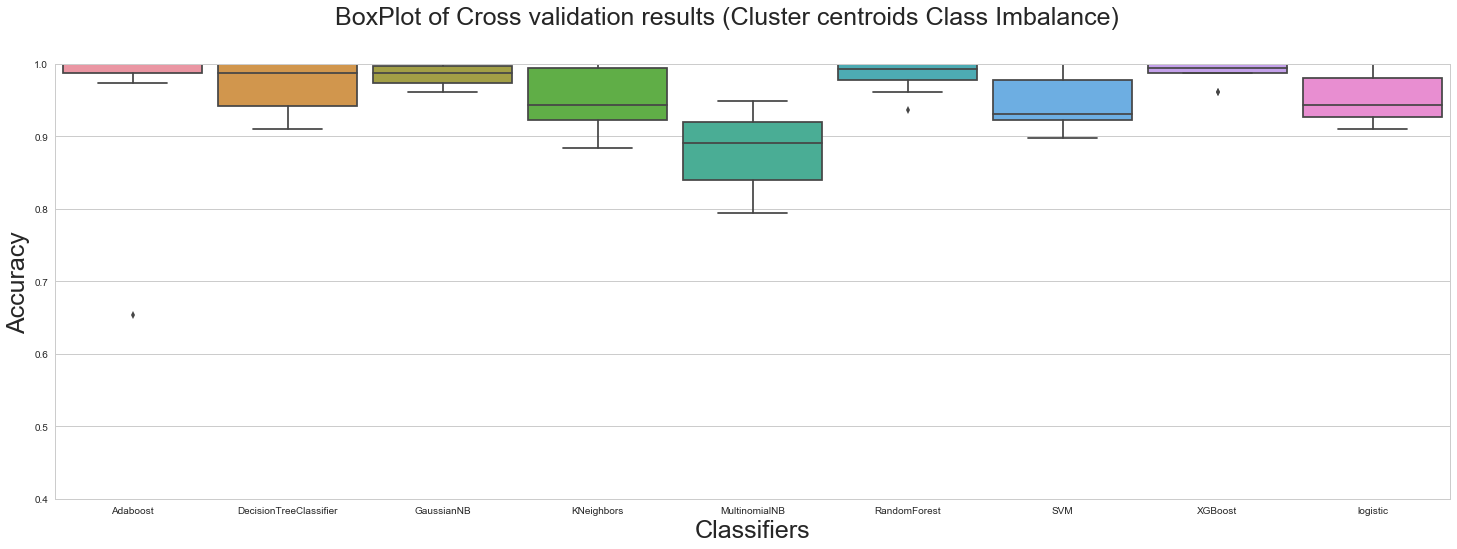

In [40]:
# rcParams['figure.figsize'] = 25,7
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res,width=0.9)
boxplot.set_ylim([0.6,1.0])
fig.suptitle('BoxPlot of Cross validation results (Cluster centroids Class Imbalance) ', fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel('Classifiers',fontsize=25)
plt.savefig('./Graph/ClusterCentroids_cross_validation.png')
plt.show()

In [41]:
p=friedman_aligned_ranks_test(res['Adaboost'],res['DecisionTreeClassifier'],res['GaussianNB'],res['KNeighbors'],
                              res['MultinomialNB'],res['RandomForest'],res['SVM'],res['XGBoost'],res['logistic'])
print(p)

# Chi2-value : float The computed Chi2-value of the test.
# p-value : float The associated p-value from the Chi2-distribution.
# rankings : array_like The ranking for each group.
# pivots : array_like The pivotal quantities for each group.

(38.522907394625975, 6.025364208350759e-06, [59.65, 49.0, 60.4, 36.5, 11.0, 61.8, 31.25, 65.5, 34.4], [5.10556867565519, 4.194012826606946, 5.169762749531827, 3.1241115953296643, 0.9415130835240083, 5.289591687434883, 2.6747530781932056, 5.606282451892959, 2.9443681884750807])


In [42]:
def predict(clf,X_test):
    return clf.predict(X_test)


 Classifier is: 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=11)
 Total time in : 
 0.2812333106994629
Confusion_matrix 
 [[128   5]
 [  2 124]]
Precision: 0.9612403100775194
Recall: 0.9841269841269841
AUC: 0.973

 Classifier is: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
 Total time in : 
 0.0
Confusion_matrix 
 [[131   2]
 [  0 126]]
Precision: 0.984375
Recall: 1.0
AUC: 0.992

 Classifier is: 
 GaussianNB(priors=None, var_smoothing=1e-09)
 Total time in : 
 0.0
Confusion_matrix 
 [[129   4]
 [  0 126]]
Precision: 0.9692307692307692
Recall: 1

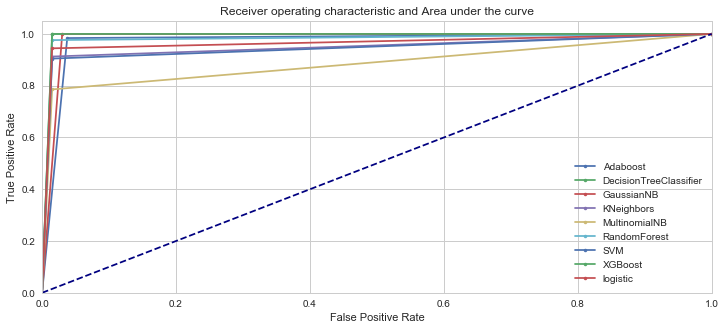

In [43]:
score = []
plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start = time.time()
    c.fit(X_train,y_train)
    pred = predict(c,X_test)
    end = time.time()
    print("\n Classifier is: \n",c)
    print(" Total time in : \n",end - start)
#     print("",c)
    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test, pred),
                    metrics.recall_score(y_test, pred)]))
    print("Confusion_matrix \n",confusion_matrix(y_test,pred))
    precision=print("Precision:",metrics.precision_score(y_test, pred))
    recall=print("Recall:",metrics.recall_score(y_test, pred))
#     ROC AND AUC CURVE
#     
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # calculate AUC
    auc = roc_auc_score(y_test, pred)
    print('AUC: %.3f' % auc)
    # plot no skill
    plt.plot(fpr, tpr, marker='.',label=n)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve',fontsize=12)
plt.legend(loc=0,fontsize='small')
    # show the plot
plt.savefig('./Graph/ClusterCentroids_2.png')
plt.show()

In [44]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores','Precision','Recall'])
score_df['Accuracy (%)']=score_df['scores']*100
score_df

,scores,Precision,Recall,Accuracy (%)
Adaboost,0.972973,0.961240,0.984127,97.297297
DecisionTreeClassifier,0.992278,0.984375,1.000000,99.227799
GaussianNB,0.984556,0.969231,1.000000,98.455598
KNeighbors,0.949807,0.982906,0.912698,94.980695
MultinomialNB,0.888031,0.980198,0.785714,88.803089
RandomForest,0.980695,0.984000,0.976190,98.069498
SVM,0.945946,0.982759,0.904762,94.594595
XGBoost,0.992278,0.984375,1.000000,99.227799
logistic,0.965251,0.983471,0.944444,96.525097


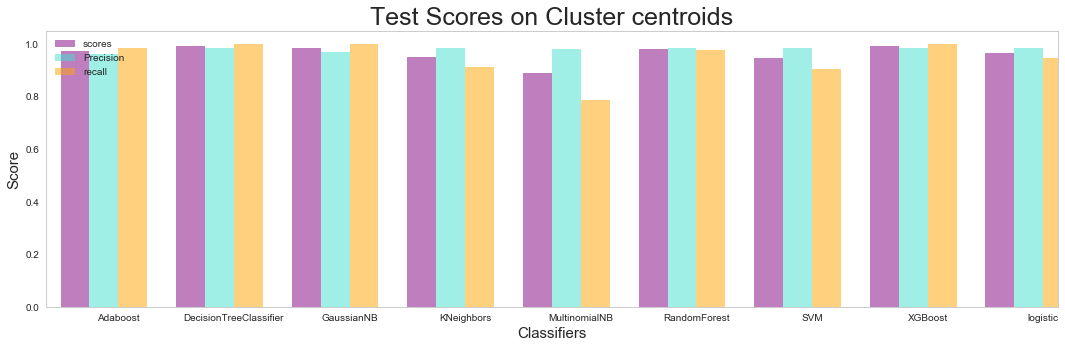

In [45]:
pos = list(range(len(df['Classiifier']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,5)) 
plt.bar(pos,score_df['scores'],width,alpha=0.5,color='purple',label=score_df['scores'][0]) 
plt.bar([p + width for p in pos],score_df['Precision'],width,alpha=0.5,color='turquoise',label=score_df['Precision'][1]) 
plt.bar([p + width*2 for p in pos],score_df['Recall'],width,alpha=0.5, color='orange',label=score_df['Recall']) 

ax.set_ylabel('Score',fontsize=15)
ax.set_xlabel('Classifiers',fontsize=15)
ax.set_title('Test Scores on Cluster centroids',fontsize=25)
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['Classiifier'])
plt.xlim(min(pos)-width, max(pos)+width*2)
plt.tight_layout()
plt.legend(['scores', 'Precision', 'recall'], loc='upper left')
plt.grid()
plt.savefig('./Graph/Cluster centroids_graph1.png')
plt.show()

### 4. AllKNN

In [46]:
print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))

5000
392


In [47]:
from imblearn.under_sampling import AllKNN
allknn = AllKNN(allow_minority=True)
X_a, y_a = allknn.fit_resample(X, y)

In [48]:
print(np.count_nonzero(y_a == 0))
print(np.count_nonzero(y_a == 1))
print('sampled dataset shape %s' % Counter(y))
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size=0.3, random_state=42)

4978
392
sampled dataset shape Counter({0: 5000, 1: 392})


In [57]:
#predict and storing score of each classifier
parameter = []
res=[]
res=pd.DataFrame(res)
for n,c in sorted (classifier.items()):
    results = cross_val_score(c,X_a, y_a, cv=skf)
#     print("\n classifier",c,"\n Cross validation results \n",results)
    parameter.append((n,[results.mean()]))
    result=pd.DataFrame(results)
#     print(result)
    res=pd.concat([res,result],axis=1,ignore_index=True)
# print(res)
res.columns = ['Adaboost', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighbors', 'MultinomialNB', 
               'RandomForest', 'SVM', 'XGBoost', 'logistic']
res

,Adaboost,DecisionTreeClassifier,GaussianNB,KNeighbors,MultinomialNB,RandomForest,SVM,XGBoost,logistic
0,1.000000,0.998141,0.957249,0.998141,0.925651,0.998141,0.983271,1.000000,0.986989
1,0.996283,0.996283,0.983271,0.992565,0.925651,0.996283,0.992565,0.996283,0.986989
2,0.990689,0.990689,0.983240,0.988827,0.927374,0.992551,0.985102,0.990689,0.985102
3,0.949721,0.996276,0.970205,0.990689,0.927374,0.996276,0.990689,0.994413,0.988827
4,1.000000,1.000000,0.973929,0.983240,0.927374,1.000000,0.985102,1.000000,0.983240
5,1.000000,1.000000,0.975791,0.985102,0.927374,1.000000,0.981378,1.000000,0.988827
6,1.000000,1.000000,0.973929,0.983240,0.927374,1.000000,0.975791,1.000000,0.988827
7,1.000000,1.000000,0.985102,0.996276,0.927374,1.000000,0.998138,1.000000,0.998138
8,1.000000,0.998134,0.979478,0.998134,0.927239,1.000000,1.000000,1.000000,1.000000
9,0.212687,0.998134,0.981343,1.000000,0.927239,1.000000,1.000000,1.000000,1.000000


In [50]:
parameter_df=pd.DataFrame.from_items(parameter,orient='index',columns=['mean'])
parameter_df

,mean
Adaboost,0.914938
DecisionTreeClassifier,0.997952
GaussianNB,0.976354
KNeighbors,0.991621
MultinomialNB,0.927002
RandomForest,0.998325
SVM,0.989204
XGBoost,0.998138
logistic,0.990880


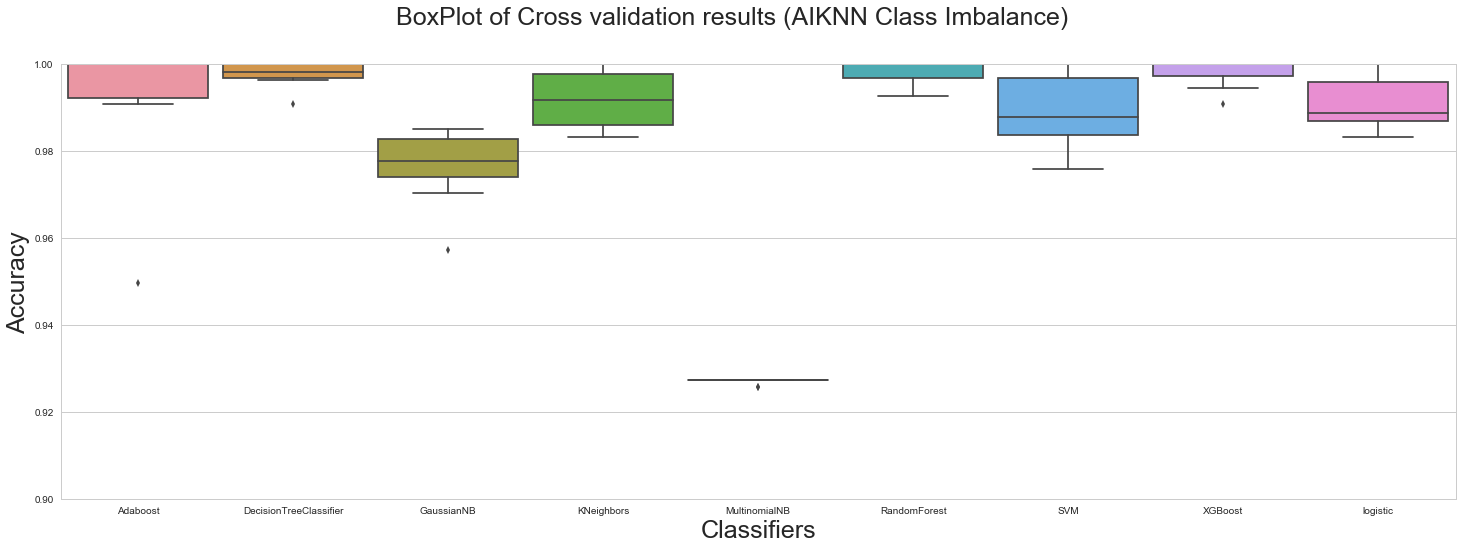

In [59]:
# rcParams['figure.figsize'] = 25,7
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style="whitegrid")
boxplot=sns.boxplot(data=res,width=0.9)
boxplot.set_ylim([0.9,1.0])
fig.suptitle('BoxPlot of Cross validation results (AIKNN Class Imbalance) ', fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel('Classifiers',fontsize=25)
plt.savefig('./Graph/AIKNN_cross_validation.png')
plt.show()

In [52]:
p=friedman_aligned_ranks_test(res['Adaboost'],res['DecisionTreeClassifier'],res['GaussianNB'],res['KNeighbors'],
                              res['MultinomialNB'],res['RandomForest'],res['SVM'],res['XGBoost'],res['logistic'])
print(p)

# Chi2-value : float The computed Chi2-value of the test.
# p-value : float The associated p-value from the Chi2-distribution.
# rankings : array_like The ranking for each group.
# pivots : array_like The pivotal quantities for each group.

(44.55819294954305, 4.461947967770996e-07, [51.05, 64.25, 23.85, 43.85, 13.7, 66.1, 40.05, 65.6, 41.05], [4.36947662853642, 5.499292328765231, 2.0413715492770548, 3.753213519320706, 1.1726117494799013, 5.657637710994268, 3.427963545012412, 5.614841661743177, 3.5135556435145947])


In [53]:
def predict(clf,X_test):
    return clf.predict(X_test)


 Classifier is: 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=11)
 Total time in : 
 1.0815374851226807
Confusion_matrix 
 [[1479    0]
 [   2  130]]
('Precision:', 1.0)
('Recall:', 0.9848484848484849)
AUC: 0.992

 Classifier is: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
 Total time in : 
 0.05196785926818848
Confusion_matrix 
 [[1479    0]
 [   0  132]]
('Precision:', 1.0)
('Recall:', 1.0)
AUC: 1.000

 Classifier is: 
 GaussianNB(priors=None, var_smoothing=1e-09)
 Total time in : 
 0.006997823715209961
Confusion_matrix 
 [[1441   38]
 [   1  

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



 Classifier is: 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)
 Total time in : 
 1.4821679592132568
Confusion_matrix 
 [[1479    0]
 [   2  130]]
('Precision:', 1.0)
('Recall:', 0.9848484848484849)
AUC: 0.992

 Classifier is: 
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
 Total time in : 
 0.051967620849609375
Confusion_matrix 
 [[1479    0]
 [  21  1

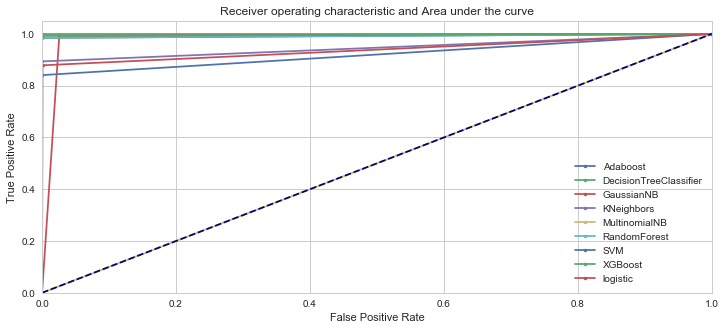

In [54]:
score = []
plt.subplots(figsize=(12,5))
for n,c in sorted(classifier.items()):
    start = time.time()
    c.fit(X_train,y_train)
    pred = predict(c,X_test)
    end = time.time()
    print("\n Classifier is: \n",c)
    print(" Total time in : \n",end - start)
#     print("",c)
    score.append((n,[accuracy_score(y_test,pred,normalize=True),metrics.precision_score(y_test, pred),
                    metrics.recall_score(y_test, pred)]))
    print("Confusion_matrix \n",confusion_matrix(y_test,pred))
    precision="Precision:",metrics.precision_score(y_test, pred)
    print(precision)
    recall="Recall:",metrics.recall_score(y_test, pred)
    print(recall)
#     ROC AND AUC CURVE
#     
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # calculate AUC
    auc = roc_auc_score(y_test, pred)
    print('AUC: %.3f' % auc)
    # plot no skill
    plt.plot(fpr, tpr, marker='.',label=n)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve',fontsize=12)
plt.legend(loc=0,fontsize='small')
    # show the plot
plt.savefig('./AIIKNN_graph2.png')
plt.show()

In [55]:
score_df=pd.DataFrame.from_items(score,orient='index',columns=['scores','Precision','Recall'])
score_df['Accuracy (%)']=score_df['scores']*100
score_df

,scores,Precision,Recall,Accuracy (%)
Adaboost,0.998759,1.000000,0.984848,99.875854
DecisionTreeClassifier,1.000000,1.000000,1.000000,100.000000
GaussianNB,0.975791,0.775148,0.992424,97.579143
KNeighbors,0.991310,1.000000,0.893939,99.130975
MultinomialNB,0.918063,0.000000,0.000000,91.806331
RandomForest,0.998759,1.000000,0.984848,99.875854
SVM,0.986965,1.000000,0.840909,98.696462
XGBoost,0.999379,1.000000,0.992424,99.937927
logistic,0.989448,0.991453,0.878788,98.944755


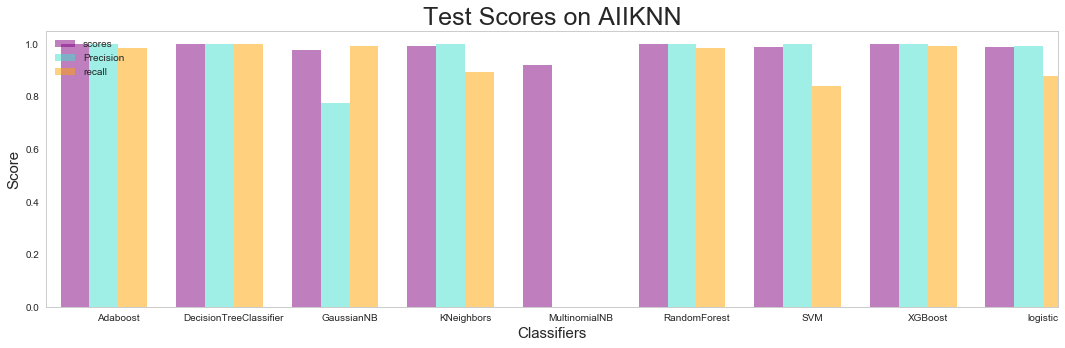

In [56]:
pos = list(range(len(df['Classiifier']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(15,5)) 
# Create a bar with pre_score data,in position pos,
plt.bar(pos,score_df['scores'],width,alpha=0.5,color='purple',label=score_df['scores'][0]) 
plt.bar([p + width for p in pos],score_df['Precision'],width,alpha=0.5,color='turquoise',label=score_df['Precision'][1]) 
plt.bar([p + width*2 for p in pos],score_df['Recall'],width,alpha=0.5, color='orange',label=score_df['Recall']) 

ax.set_ylabel('Score',fontsize=15)
ax.set_xlabel('Classifiers',fontsize=15)
ax.set_title('Test Scores on AIIKNN',fontsize=25)
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['Classiifier'])
plt.xlim(min(pos)-width, max(pos)+width*2)
# plt.ylim([0, max(score_df['scores'] + score_df['Precision'] + score_df['Recall'])] )
# plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.legend(['scores', 'Precision', 'recall'], loc='upper left')
plt.grid()
plt.savefig('./AIIKNN_graph1.png')
plt.show()